In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# **Load data**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/working/Data_working.csv")

In [3]:
df.head(1)

,Date,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
0,16/04/2023,30310.3,30299.2,30545.3,30134.6,34.48,840992.0,4.788780e+13,1866594.29,495223185.0,...,2119.29,100.03,0.090465,0.52089,2015.6,25.438,NaN,NaN,NaN,NaN


In [4]:
# df['Date'].dropna().tail(1)
df['Date']

0       16/04/2023
1       15/04/2023
2       14/04/2023
3       13/04/2023
4       12/04/2023
           ...    
6947           NaN
6948           NaN
6949           NaN
6950           NaN
6951           NaN
Name: Date, Length: 6952, dtype: object

# **time series**

In [5]:
df['Date'].astype(str).apply(lambda x: x[-7:])

0       04/2023
1       04/2023
2       04/2023
3       04/2023
4       04/2023
         ...   
6947        nan
6948        nan
6949        nan
6950        nan
6951        nan
Name: Date, Length: 6952, dtype: object

In [6]:
df['month'] = df['Date'].astype(str).apply(lambda x: x[-7:])
df_monthly_mean = df.groupby('month').mean()

<ipython-input-6-7f6fca29f698>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly_mean = df.groupby('month').mean()


In [7]:
df_monthly_mean.head(20)

,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,Total_Fees(USD),...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
month,,,,,,,,,,,,,,,,,,,,,
01/2011,0.354839,0.348387,0.377419,0.345161,12.186129,1.606774e+03,1.784194e+04,2.152386e+03,1.423768e+06,1.150342e-01,...,NaN,NaN,NaN,NaN,1362.238095,28.525333,9521.500000,1282.618500,11802.370500,10449.530000
01/2012,6.122581,6.096774,6.448387,5.735484,103.525161,1.421065e+04,1.246181e+06,2.068464e+04,1.258612e+07,1.108693e+02,...,NaN,NaN,NaN,NaN,1660.880952,30.929619,8051.065789,1300.577500,12550.892000,8616.708947
01/2013,15.600000,15.377419,15.864516,15.087097,46.942258,5.175332e+04,3.109844e+06,1.475840e+05,8.337374e+07,6.665379e+02,...,NaN,NaN,NaN,NaN,1672.140909,31.228182,8088.579545,1480.395238,13615.322857,10750.854737
01/2014,935.464516,931.177419,966.835484,899.641935,9.879677,1.389051e+05,1.733111e+09,1.714224e+05,1.196635e+08,1.163494e+04,...,NaN,NaN,NaN,NaN,1243.981818,19.878045,7261.943182,1822.356667,16243.722381,15578.280000
01/2015,248.209677,251.425806,262.503226,238.329032,50.208387,2.360833e+05,4.231891e+10,3.638212e+05,2.096547e+08,3.625845e+03,...,NaN,NaN,NaN,0.015509,1255.061905,17.260286,5778.333333,2028.178500,17542.255000,17274.399474
01/2016,410.938710,412.880645,419.296774,401.929032,80.194194,4.645770e+05,1.107829e+11,6.678078e+05,4.160969e+08,1.514077e+04,...,NaN,NaN,NaN,0.005260,1096.830000,14.089850,4466.675000,1918.597895,16305.252105,17302.297368
01/2017,909.674194,909.606452,934.403226,876.783871,71.359677,6.450910e+05,3.471915e+11,8.715242e+05,5.483903e+08,1.039501e+05,...,10.158065,4.046774,NaN,0.006520,1195.390476,16.941381,5775.035714,2275.116000,19908.152500,19194.056316
01/2018,13003.535484,13119.080645,13617.112903,12241.258065,156.218065,1.000830e+06,2.190596e+12,1.054058e+06,6.415990e+08,6.588671e+06,...,1088.840968,214.273032,0.009448,1.781627,1333.113636,17.173455,7109.750000,2789.803810,25804.017619,23712.210000
01/2019,3653.335484,3662.125806,3713.900000,3597.112903,503.783871,5.856172e+05,5.763982e+12,9.593382e+05,4.602151e+08,7.496077e+04,...,126.626452,32.591581,0.002089,0.330116,1292.800000,15.651864,5968.727273,2607.390000,24157.795238,20460.512105


In [8]:
df_monthly_mean = df_monthly_mean.reset_index().rename(columns = {'month':'DOY'})

In [9]:
df_monthly_mean

,DOY,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
0,01/2011,0.354839,0.348387,0.377419,0.345161,12.186129,1.606774e+03,1.784194e+04,2.152386e+03,1.423768e+06,...,NaN,NaN,NaN,NaN,1362.238095,28.525333,9521.500000,1282.618500,11802.370500,10449.530000
1,01/2012,6.122581,6.096774,6.448387,5.735484,103.525161,1.421065e+04,1.246181e+06,2.068464e+04,1.258612e+07,...,NaN,NaN,NaN,NaN,1660.880952,30.929619,8051.065789,1300.577500,12550.892000,8616.708947
2,01/2013,15.600000,15.377419,15.864516,15.087097,46.942258,5.175332e+04,3.109844e+06,1.475840e+05,8.337374e+07,...,NaN,NaN,NaN,NaN,1672.140909,31.228182,8088.579545,1480.395238,13615.322857,10750.854737
3,01/2014,935.464516,931.177419,966.835484,899.641935,9.879677,1.389051e+05,1.733111e+09,1.714224e+05,1.196635e+08,...,NaN,NaN,NaN,NaN,1243.981818,19.878045,7261.943182,1822.356667,16243.722381,15578.280000
4,01/2015,248.209677,251.425806,262.503226,238.329032,50.208387,2.360833e+05,4.231891e+10,3.638212e+05,2.096547e+08,...,NaN,NaN,NaN,0.015509,1255.061905,17.260286,5778.333333,2028.178500,17542.255000,17274.399474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,12/2019,7254.854839,7266.190323,7398.596774,7144.300000,640.860323,6.971384e+05,1.292007e+13,9.844911e+05,4.486599e+08,...,137.566129,42.660065,0.002227,0.206485,1486.490476,17.191619,6102.675000,3176.749524,28167.005714,23660.375714
151,12/2020,21982.048387,21683.641935,22392.267742,21178.341935,123.412581,1.071403e+06,1.886435e+13,1.288197e+06,5.714941e+08,...,622.350645,99.517968,0.003809,0.474518,1862.845455,25.168500,7788.404762,3695.310000,30148.580000,26772.954545
152,12/2021,49296.770968,49642.796774,50743.696774,48027.619355,61.403226,9.721000e+05,2.359049e+13,1.190462e+06,4.699838e+08,...,4045.723871,158.396774,0.178073,0.866018,1792.531818,22.515273,9524.547619,4674.780455,35641.334091,28514.228182
153,12/2022,16942.287097,16962.229032,17120.767742,16782.335484,211.309677,9.029791e+05,3.513115e+13,1.204399e+06,4.466963e+08,...,1236.584194,71.682581,0.084962,0.368898,1807.818182,23.568091,8402.475000,3912.380952,33482.178571,27214.691818


In [10]:
df_monthly_mean['DOY'] = pd.to_datetime(df_monthly_mean['DOY'])

In [11]:
D=df_monthly_mean['DOY']

In [12]:
df_monthly_mean = df_monthly_mean.sort_values('DOY').reset_index().drop(columns = 'index')
df_monthly_mean

,DOY,BTC_close,BTC_open,BTC_high,BTC_low,BTC_volume,Active_Addr_Cnt,Difficulty,Mean_Block_Size(in_bytes),Sum_Block_Weight,...,ETH,LTC,DOGE,XRP,GOLD,SILVER,COPPER,S&P500,DJI,JP225
0,2010-07-01,0.100000,0.092857,0.100000,0.100000,2.274286,866.500000,2.039286e+02,1.288552e+03,9.708220e+05,...,NaN,NaN,NaN,NaN,1180.540000,17.816400,7043.906250,1095.876000,10374.594000,9395.562857
1,2010-08-01,0.100000,0.100000,0.100000,0.096774,7.151935,624.419355,4.372258e+02,6.832053e+02,5.114920e+05,...,NaN,NaN,NaN,NaN,1219.313636,18.470864,7301.657895,1087.282273,10350.396364,9268.235000
2,2010-09-01,0.100000,0.100000,0.103333,0.100000,7.227667,745.833333,8.019333e+02,7.606135e+02,5.587224e+05,...,NaN,NaN,NaN,NaN,1274.222727,20.594955,7743.950000,1122.081905,10598.066190,9346.724000
3,2010-10-01,0.119355,0.116129,0.125806,0.112903,35.676129,823.064516,1.657097e+03,8.160655e+02,5.974853e+05,...,NaN,NaN,NaN,NaN,1344.157143,23.442333,8294.657895,1171.583810,11044.485238,9455.093000
4,2010-11-01,0.263333,0.263333,0.296667,0.240000,27.542333,953.633333,5.080833e+03,3.332992e+03,2.210221e+06,...,NaN,NaN,NaN,NaN,1370.277273,26.632409,8485.762500,1198.888571,11198.312857,9797.180500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2023-01-01,20242.125806,20029.019355,20485.509677,19831.025806,287.990000,920402.032258,3.615845e+13,1.166291e+06,4.602668e+08,...,1466.301935,84.329355,0.081517,0.381160,1902.486957,23.880174,9055.285714,3960.656500,33655.716500,26606.281579
151,2023-02-01,23292.742857,23292.403571,23718.732143,22892.014286,324.042143,961084.250000,3.979060e+13,1.999236e+06,5.859026e+08,...,1624.176071,96.256786,0.086333,0.390533,1854.164286,21.910619,8961.975000,4079.684737,33648.471579,27509.114737
152,2023-03-01,25079.564516,24907.267742,25608.758065,24404.235484,329.948065,968807.580645,4.425338e+13,2.052125e+06,5.997125e+08,...,1672.958710,85.623226,0.073759,0.410685,1923.552174,21.987826,8867.760870,3968.614348,32483.534783,27693.202273
153,2023-04-01,29013.506250,28898.918750,29327.212500,28611.725000,59.503750,998270.437500,4.751981e+13,1.849112e+06,5.775974e+08,...,1918.028125,93.303750,0.086544,0.510769,2010.280000,25.163100,8887.875000,4112.707778,33645.091111,27956.994000


In [13]:
box = list(df.columns.values[1:-1])
box

['BTC_close',
 'BTC_open',
 'BTC_high',
 'BTC_low',
 'BTC_volume',
 'Active_Addr_Cnt',
 'Difficulty',
 'Mean_Block_Size(in_bytes)',
 'Sum_Block_Weight',
 'Total_Fees(USD)',
 'Mean_Hashrate',
 'Xfer_Cnt',
 'Mean_Tx_size(native_units)',
 'ETH',
 'LTC',
 'DOGE',
 'XRP',
 'GOLD',
 'SILVER',
 'COPPER',
 'S&P500',
 'DJI',
 'JP225']

<ipython-input-15-728e6db3fe07>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (8,4))


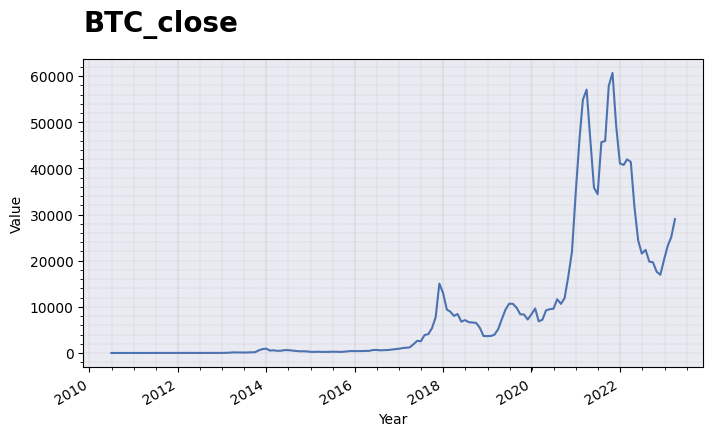

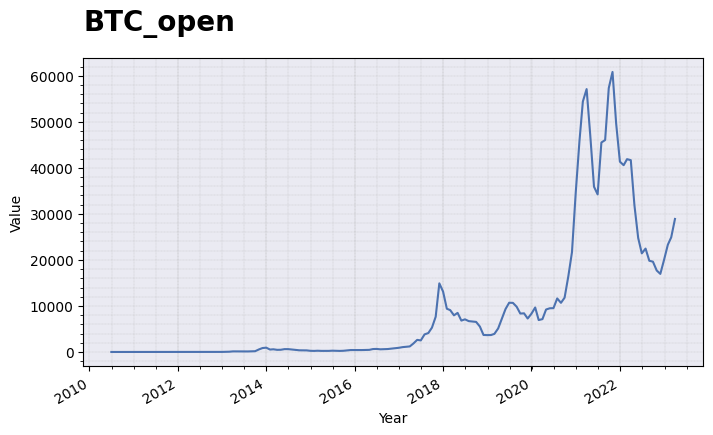

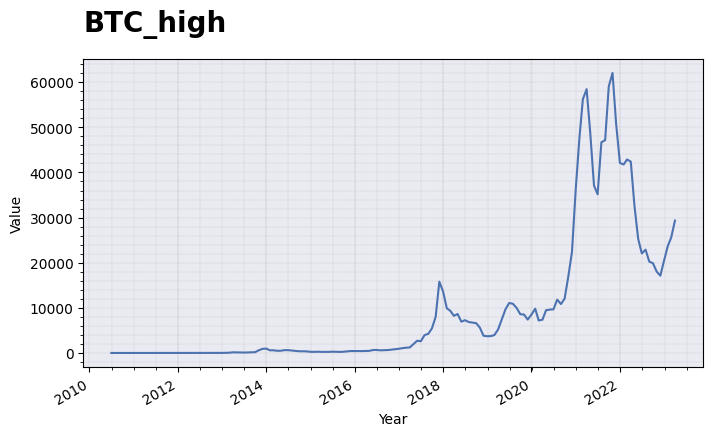

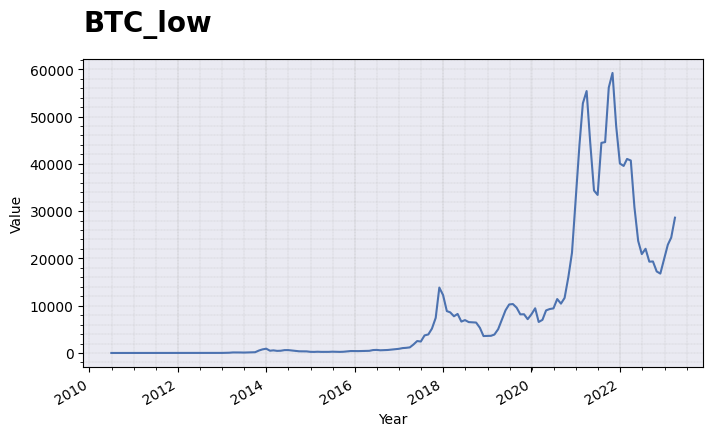

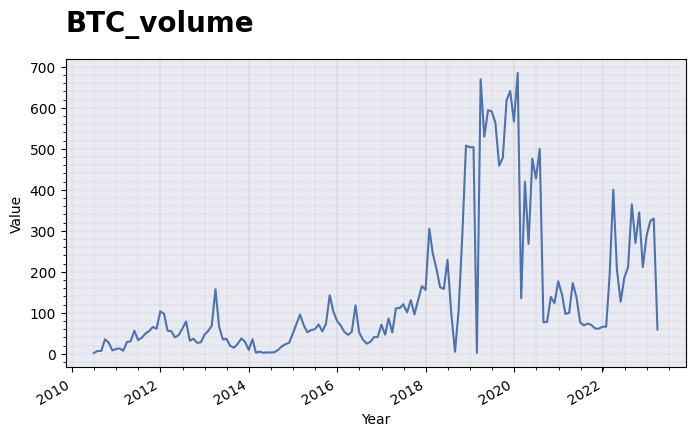

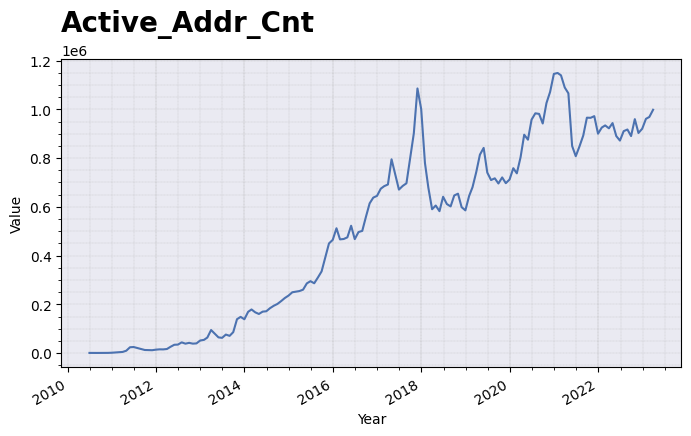

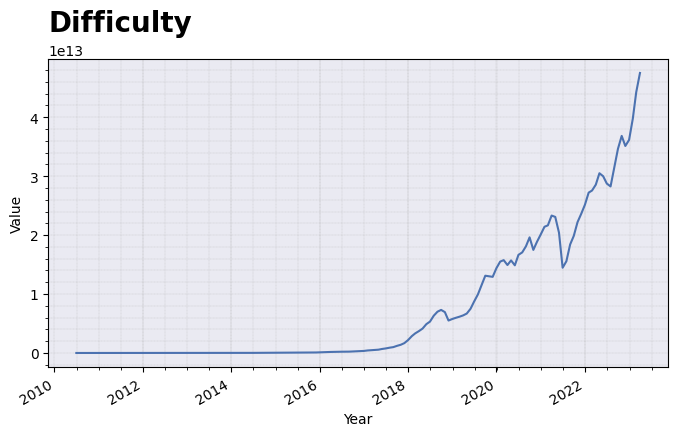

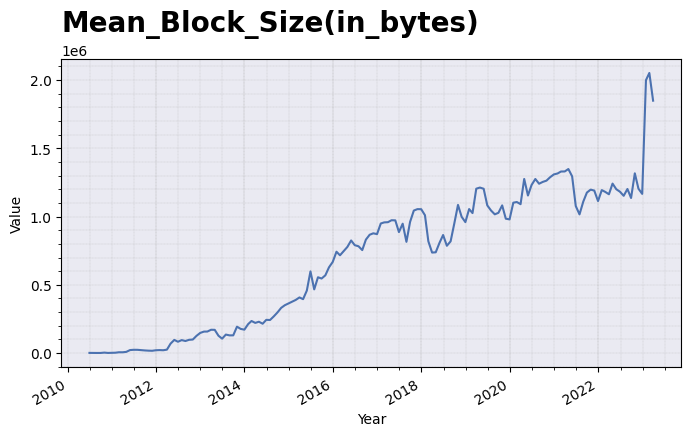

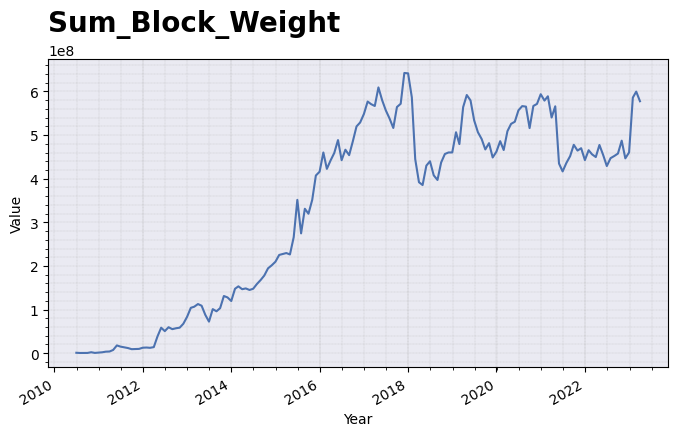

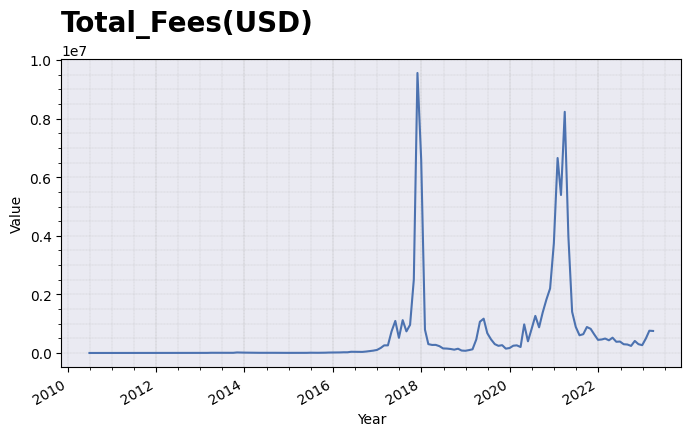

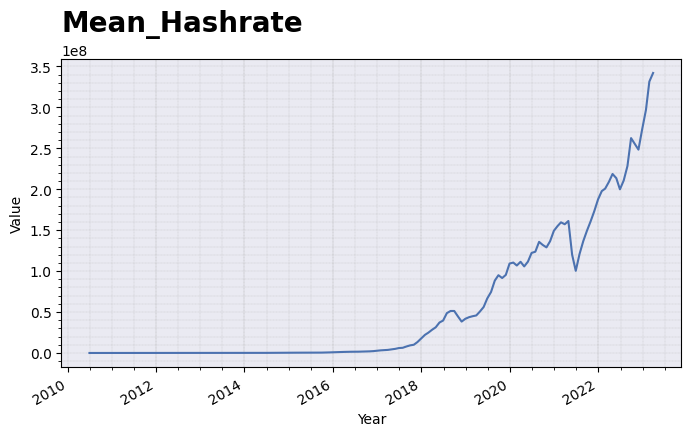

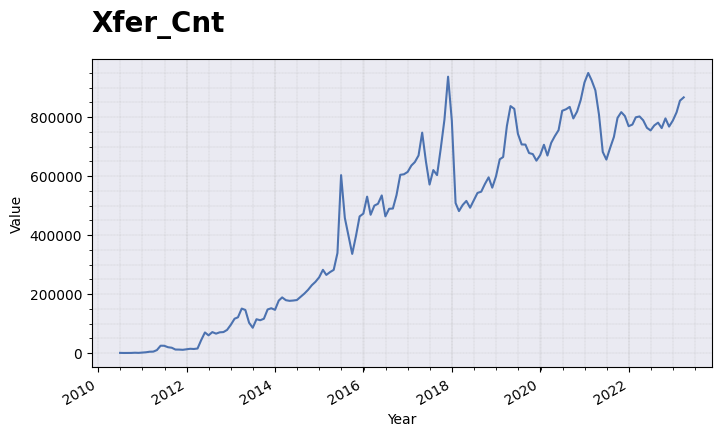

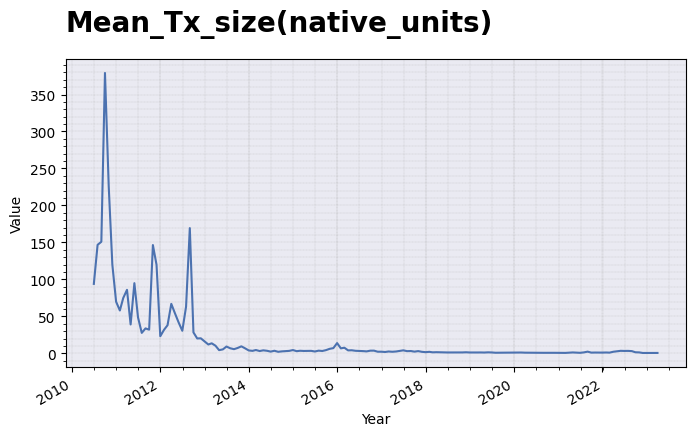

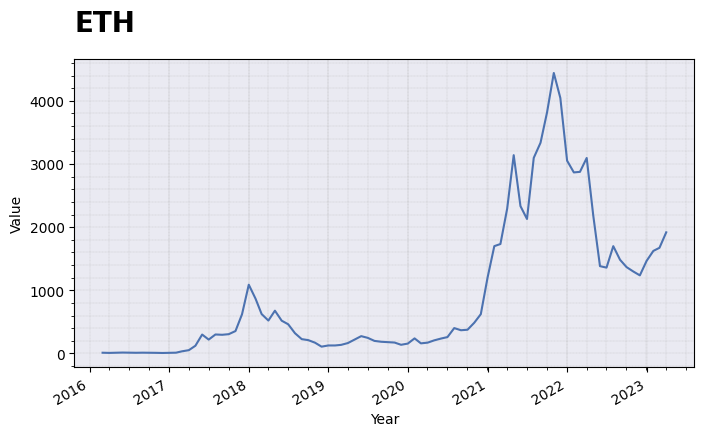

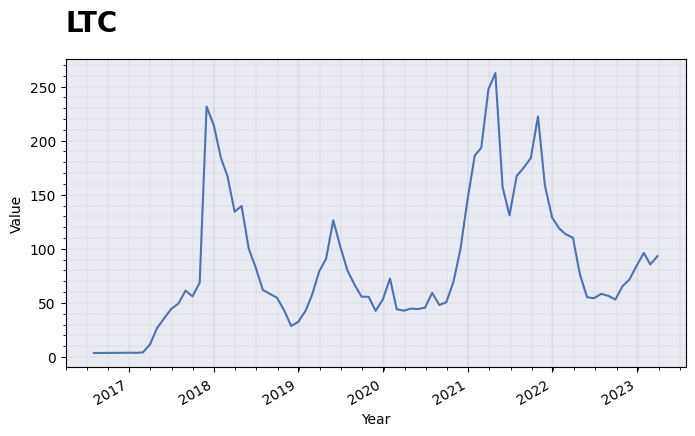

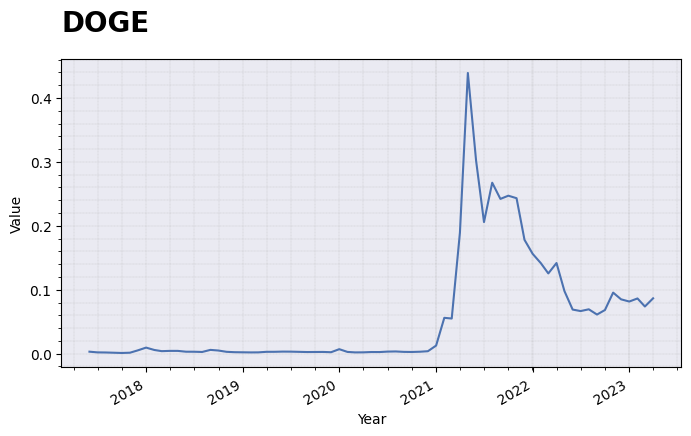

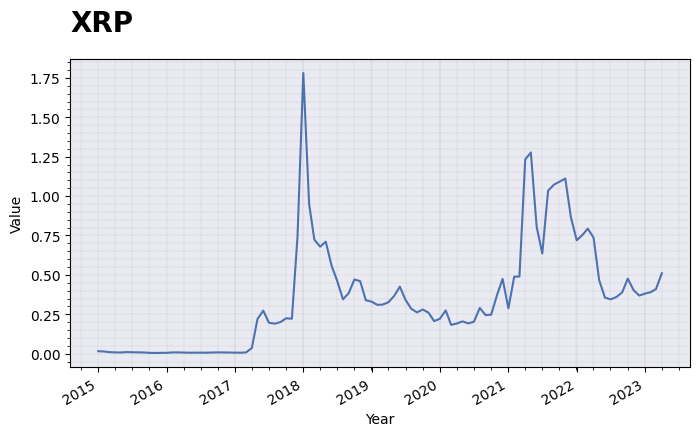

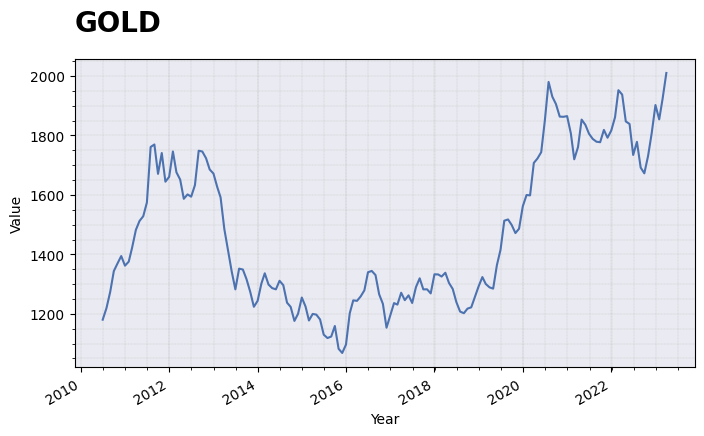

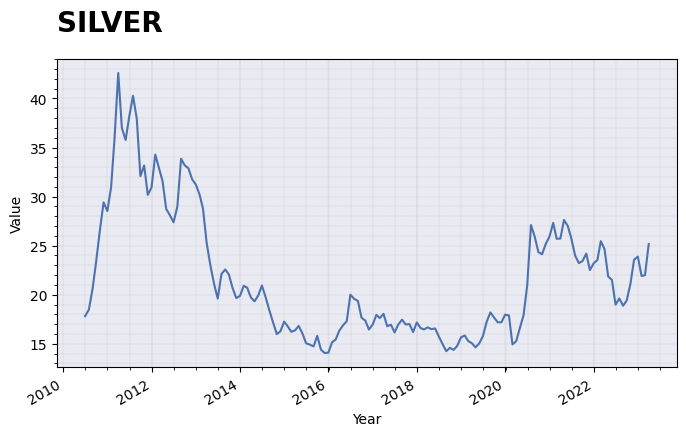

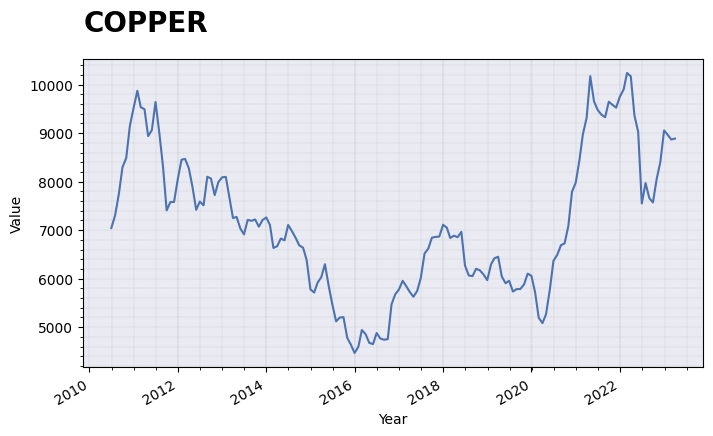

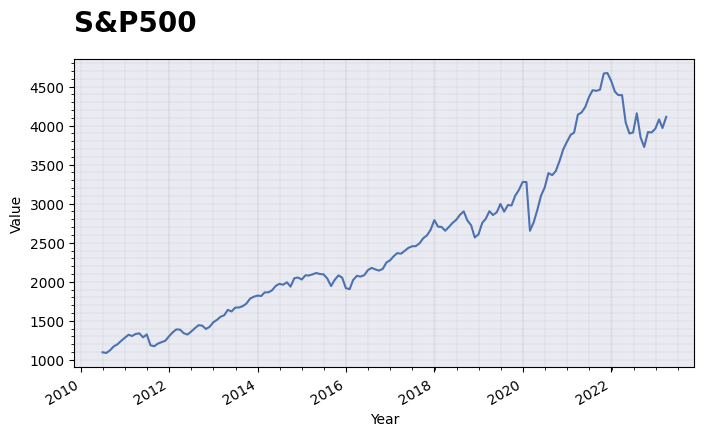

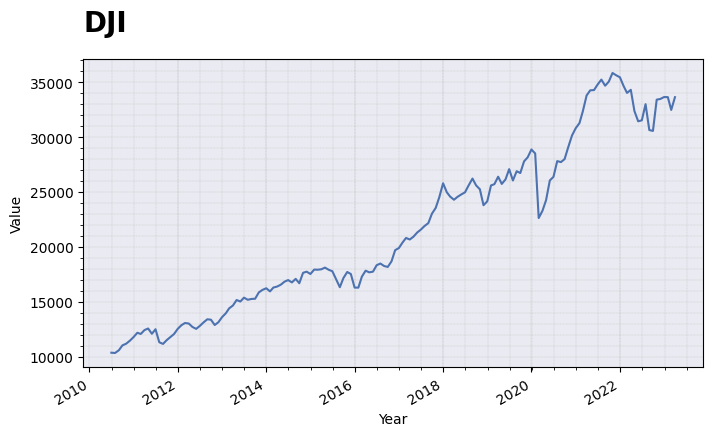

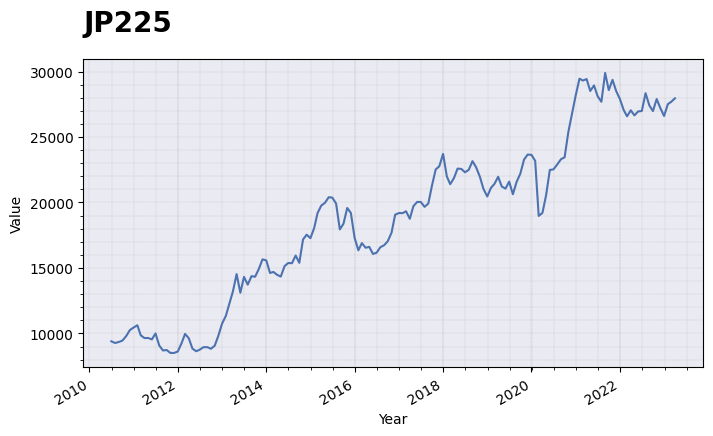

In [15]:
# grid 
for target in box:
  # if target == 'BTC_close':
    # Loading the dataset
    data = df_monthly_mean.copy()

    # X axis is price_date
    D = data['DOY']

    # Y axis is price closing
    price_close = data[target]

    fig, ax = plt.subplots(figsize = (8,4))
    
    # ax = plt.axes()
    ax.set_facecolor("#EAEAF2")
    # ax.scatter(D,df_monthly_mean[target])

    # Plotting the timeseries graph of given dataset
    plt.plot(D, price_close, color = '#4C72B0')

    # # Enabling both grid lines
    ax.grid(which = "both", linestyle = "dashed", linewidth = 0.2)
    ax.minorticks_on()


    # Giving title to the graph
    title = target
    plt.title(title,loc = 'left',fontsize=20, fontweight = 'bold',pad=20)

    # rotating the x-axis tick labels at 30degree
    # towards right
    plt.xticks(rotation=30, ha='right')



    # Giving x and y label to the graph
    plt.xlabel('Year')
    plt.ylabel('Value')


Text(0, 0.5, 'Value')

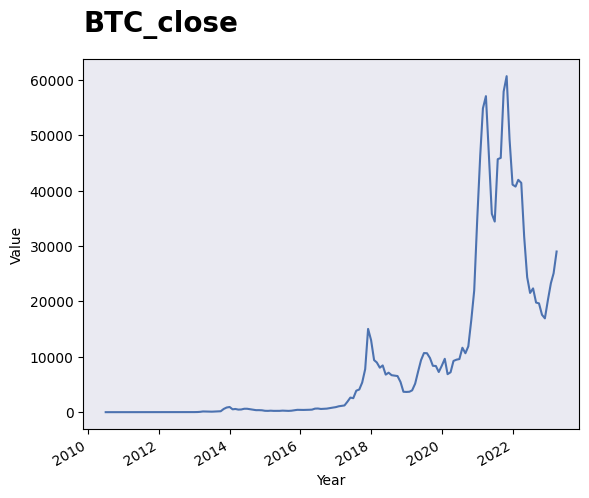

In [ ]:
### no grid
    # Loading the dataset
    data = df_monthly_mean.copy()

    # X axis is price_date
    D = data['DOY']

    # Y axis is price closing
    price_close = data['BTC_close']


    ax = plt.axes()
    ax.set_facecolor("#EAEAF2")
    # Plotting the timeseries graph of given dataset
    plt.plot(D, price_close, color = '#4C72B0')

    # Giving title to the graph
    title = 'BTC_close'
    plt.title(title,loc = 'left',fontsize=20, fontweight = 'bold',pad=20)

    # rotating the x-axis tick labels at 30degree
    # towards right
    plt.xticks(rotation=30, ha='right')



    # Giving x and y label to the graph
    plt.xlabel('Year')
    plt.ylabel('Value')
